In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


# **Importing of Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# **Preprocessing the dataset**

In [34]:
ml = pd.read_csv('/content/drive/MyDrive/ml /live.zip')

In [35]:
print("Column names in ml:", ml.columns)


Column names in ml: Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')


**Removing null columns :**

In [36]:
print('Before\n', round(ml.isna().mean() * 100, 2))
ml = ml.drop(columns = ['Column1', 'Column2', 'Column3', 'Column4'])
datast = ml
print('After\n', round(ml.isna().mean() * 100, 2))

Before
 status_id             0.0
status_type           0.0
status_published      0.0
num_reactions         0.0
num_comments          0.0
num_shares            0.0
num_likes             0.0
num_loves             0.0
num_wows              0.0
num_hahas             0.0
num_sads              0.0
num_angrys            0.0
Column1             100.0
Column2             100.0
Column3             100.0
Column4             100.0
dtype: float64
After
 status_id           0.0
status_type         0.0
status_published    0.0
num_reactions       0.0
num_comments        0.0
num_shares          0.0
num_likes           0.0
num_loves           0.0
num_wows            0.0
num_hahas           0.0
num_sads            0.0
num_angrys          0.0
dtype: float64


**Unique values :**

In [17]:
features = ml.columns.tolist()
for i in features:
  num_unique_values = ml[i].nunique()
  print(i, " ", num_unique_values)

status_type   4
num_reactions   1067
num_comments   993
num_shares   501
num_likes   1044
num_loves   229
num_wows   65
num_hahas   42
num_sads   24
num_angrys   14


**Categorical and Numerical features**

In [19]:
categorical_features = ml.select_dtypes(include = ['object']).columns.tolist()
numerical_features = ml.select_dtypes(include = ['float64', 'int64']).columns.tolist()

print("Numerical Features\n\n", numerical_features, "\n")
print("Categorical Features\n\n", categorical_features, "\n")

Numerical Features

 ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] 

Categorical Features

 ['status_type'] 



**Applying feature scaling**

In [21]:
sc = StandardScaler()
datast[numerical_features] = sc.fit_transform(ml[numerical_features])

# **K MEANS CLUSTERING**

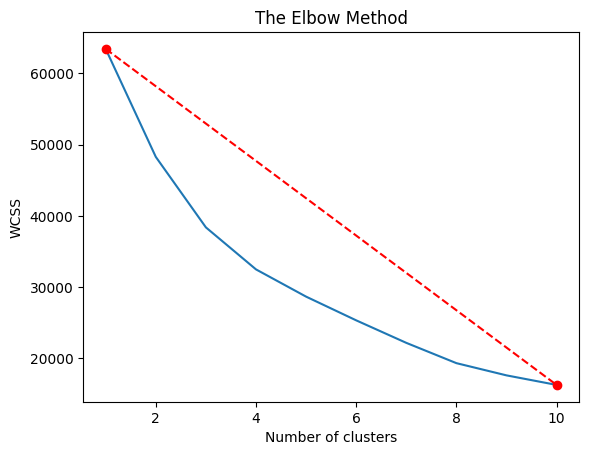

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(ml[numerical_features])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot([1, 10], [wcss[0], wcss[-1]], marker='o', color='r', linestyle='--')
plt.show()

The line becomes linear from the value of 5, so optimal number of clusters is 5.

In [23]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(ml[numerical_features])
ml['cluster'] = kmeans.labels_

**Plotting the clusters and centroids**

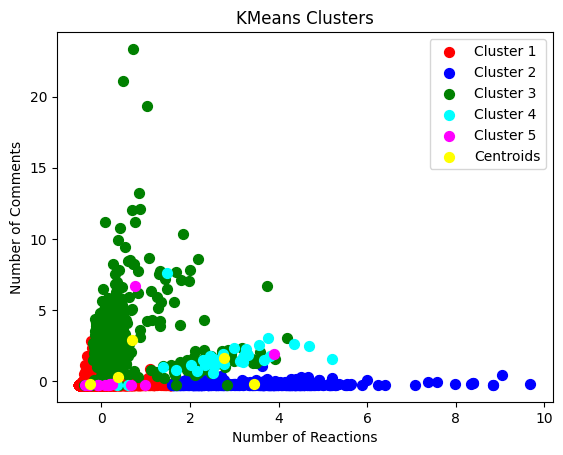

In [24]:
plt.scatter(ml[ml['cluster'] == 0]['num_reactions'], ml[ml['cluster'] == 0]['num_comments'], s=50, c='red', label='Cluster 1')
plt.scatter(ml[ml['cluster'] == 1]['num_reactions'], ml[ml['cluster'] == 1]['num_comments'], s=50, c='blue', label='Cluster 2')
plt.scatter(ml[ml['cluster'] == 2]['num_reactions'], ml[ml['cluster'] == 2]['num_comments'], s=50, c='green', label='Cluster 3')
plt.scatter(ml[ml['cluster'] == 3]['num_reactions'], ml[ml['cluster'] == 3]['num_comments'], s=50, c='cyan', label='Cluster 4')
plt.scatter(ml[ml['cluster'] == 4]['num_reactions'], ml[ml['cluster'] == 4]['num_comments'], s=50, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='yellow', label='Centroids')
plt.title('KMeans Clusters')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.legend()
plt.show()

**majority types**

In [25]:
cluster_majority_status = ml.groupby('cluster')['status_type'].agg(lambda x: x.value_counts().index[0]).reset_index()

print("Majority status_type in each cluster:")
print(cluster_majority_status)

Majority status_type in each cluster:
   cluster status_type
0        0       photo
1        1       photo
2        2       video
3        3       video
4        4       photo


# **Hierarchical clustering**

**Dendrogram**

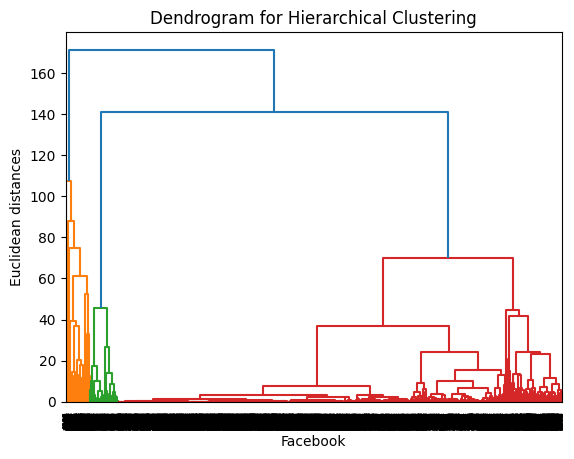

In [26]:
dendrogram = sch.dendrogram(sch.linkage(ml[numerical_features], method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Facebook')
plt.ylabel('Euclidean distances')
plt.show()

Optimal K value is 4

In [27]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc.fit(ml[numerical_features])
ml['cluster'] = hc.labels_

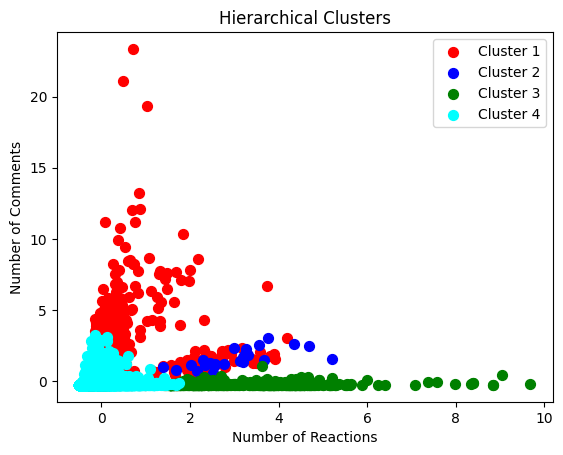

In [28]:
plt.scatter(ml[ml['cluster'] == 0]['num_reactions'], ml[ml['cluster'] == 0]['num_comments'], s=50, c='red', label='Cluster 1')
plt.scatter(ml[ml['cluster'] == 1]['num_reactions'], ml[ml['cluster'] == 1]['num_comments'], s=50, c='blue', label='Cluster 2')
plt.scatter(ml[ml['cluster'] == 2]['num_reactions'], ml[ml['cluster'] == 2]['num_comments'], s=50, c='green', label='Cluster 3')
plt.scatter(ml[ml['cluster'] == 3]['num_reactions'], ml[ml['cluster'] == 3]['num_comments'], s=50, c='cyan', label='Cluster 4')
plt.title('Hierarchical Clusters')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.legend()
plt.show()

**Majority status types**

In [29]:
cluster_majority_status = ml.groupby('cluster')['status_type'].agg(lambda x: x.value_counts().index[0]).reset_index()

print("Majority status_type in each cluster:")
print(cluster_majority_status)

Majority status_type in each cluster:
   cluster status_type
0        0       video
1        1       video
2        2       photo
3        3       photo
